# Loading and connecting

In [59]:
pip install neo4j

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
from neo4j import GraphDatabase
import pandas as pd

In [61]:
NEO4J_URI = "bolt://localhost:7687"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "23042001"
BASE_URL = 'http://localhost:11001/project-4182c40d-b40b-43b2-98c1-a7911d88645b'

In [62]:
driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# Clusters

In [70]:
def extract_features_from_neo4j():
    with driver.session() as session:
        result = session.run(
        """MATCH (p:Papers)
           RETURN p.name AS paperName, p.cluster2d AS cluster2d, p.embedding2d AS embedding2d
        """)
        # Convert the result to a pandas DataFrame
        df = pd.DataFrame([r.values() for r in result], columns=result.keys())
    return df

In [71]:
papers=extract_features_from_neo4j()

In [ ]:
papers

,paperName,cluster2d,embedding2d
0,Meltdown,2,"[0.041127145290374756, -0.8980717658996582]"
1,An Evaluation of Object-Oriented DBMS Developm...,0,"[1.4456841945648193, -1.261210560798645]"
2,DARWIN: On the Incremental Migration of Legacy...,0,"[1.6357154846191406, -1.1318942308425903]"
3,"Integrating Heterogeneous, Autonomous, Distrib...",0,"[1.173250436782837, -1.4181960821151733]"
4,Object Model Capabilities For Distributed Obje...,0,"[1.6025452613830566, -0.8893471956253052]"
...,...,...,...
1995,Efficient Learning of Deep Boltzmann Machines.,0,"[1.1599383354187012, -1.4353675842285156]"
1996,Online Learning of Structured Predictors with ...,1,"[-0.6120878458023071, -1.4551526308059692]"
1997,Tree-Based Inference for Dirichlet Process Mix...,1,"[-0.8158276081085205, -1.456709861755371]"
1998,Learning Functions of Halfspaces using Prefix ...,1,"[-0.8065453767776489, -1.816255807876587]"


## 2D visualization of distribution of clusters in the embedding space

In [72]:
papers[['x', 'y']] = papers['embedding2d'].apply(pd.Series)

In [73]:
papers

,paperName,cluster2d,embedding2d,x,y
0,Meltdown,2,"[0.041127145290374756, -0.8980717658996582]",0.041127,-0.898072
1,An Evaluation of Object-Oriented DBMS Developm...,0,"[1.4456841945648193, -1.261210560798645]",1.445684,-1.261211
2,DARWIN: On the Incremental Migration of Legacy...,0,"[1.6357154846191406, -1.1318942308425903]",1.635715,-1.131894
3,"Integrating Heterogeneous, Autonomous, Distrib...",0,"[1.173250436782837, -1.4181960821151733]",1.173250,-1.418196
4,Object Model Capabilities For Distributed Obje...,0,"[1.6025452613830566, -0.8893471956253052]",1.602545,-0.889347
...,...,...,...,...,...
1995,Efficient Learning of Deep Boltzmann Machines.,0,"[1.1599383354187012, -1.4353675842285156]",1.159938,-1.435368
1996,Online Learning of Structured Predictors with ...,1,"[-0.6120878458023071, -1.4551526308059692]",-0.612088,-1.455153
1997,Tree-Based Inference for Dirichlet Process Mix...,1,"[-0.8158276081085205, -1.456709861755371]",-0.815828,-1.456710
1998,Learning Functions of Halfspaces using Prefix ...,1,"[-0.8065453767776489, -1.816255807876587]",-0.806545,-1.816256


In [74]:
papers['x'] = pd.to_numeric(papers['x'], errors='coerce')
papers['y'] = pd.to_numeric(papers['y'], errors='coerce')

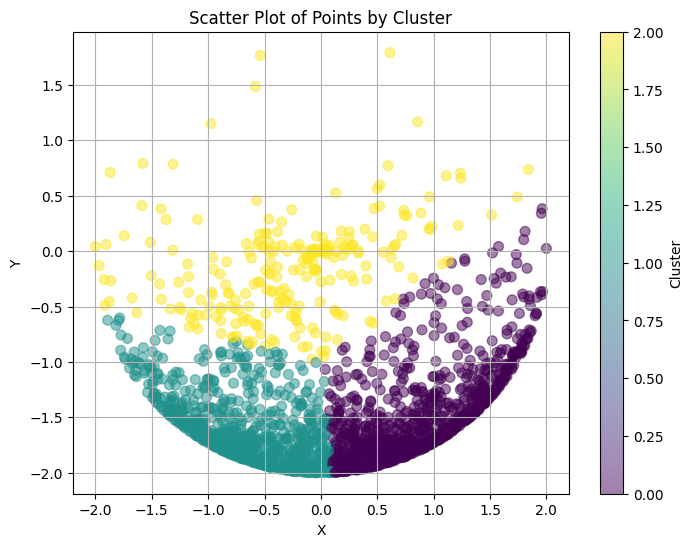

In [75]:
import matplotlib.pyplot as plt


# Plot the scatter plot based on the cluster column
plt.figure(figsize=(8, 6))
plt.scatter(papers["x"], papers["y"], s=50, c=papers["cluster2d"], cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Points by Cluster')
plt.grid(True)
plt.show()


# Statistics about each cluster

In [76]:
def extract_features_from_neo4j_statistics():
    with driver.session() as session:
        result = session.run(
        """MATCH (p:Papers)
RETURN p.cluster32d AS cluster, COUNT(p) AS num_paper
        """)
        # Convert the result to a pandas DataFrame
        df = pd.DataFrame([r.values() for r in result], columns=result.keys())
    return df

In [79]:
stats=extract_features_from_neo4j_statistics()
stats

,cluster,num_paper
0,2,725
1,1,639
2,0,636


the clusters are balanced

## Keywords

In [80]:
def extract_features_from_neo4j_keywords():
    with driver.session() as session:
        result = session.run(
        """MATCH (p:Papers)-[:relates_to]->(k:Keywords)
RETURN p.cluster32d AS cluster, k.name AS keyword, COUNT(*) AS num_keyword
ORDER BY num_keyword DESC
        """)
        # Convert the result to a pandas DataFrame
        df = pd.DataFrame([r.values() for r in result], columns=result.keys())
    return df

In [81]:
keywords=extract_features_from_neo4j_keywords()
keywords

,cluster,keyword,num_keyword
0,0,mathematical methods,406
1,0,graph processing,403
2,2,data modeling,394
3,2,data processing,389
4,1,AI,316
5,1,NLP,311
6,0,data processing,264
7,2,AI,249
8,2,data management,214
9,1,biology,212


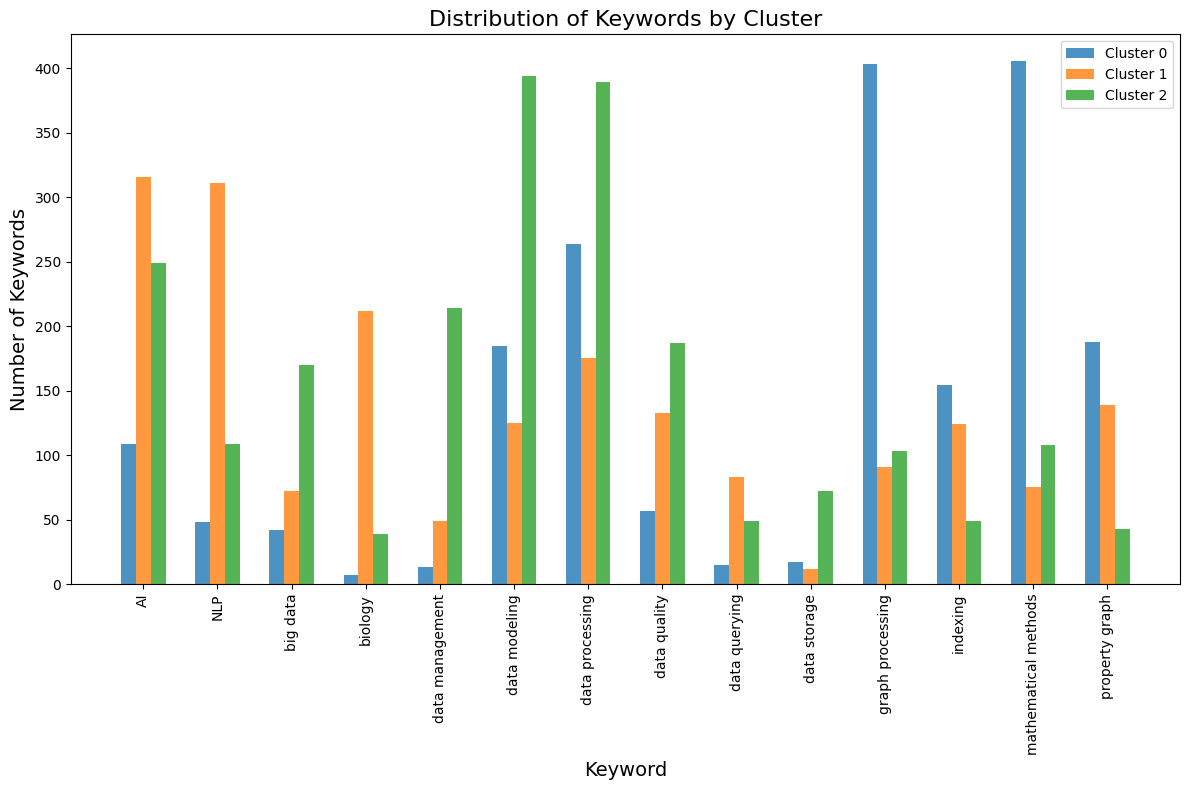

In [83]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array(keywords)
clusters = np.unique(data[:, 0])
keywords = np.unique(data[:, 1])
num_keywords = np.zeros((len(clusters), len(keywords)), dtype=int)


for d in data:
    cluster_index = np.where(clusters == d[0])[0][0]
    keyword_index = np.where(keywords == d[1])[0][0]
    num_keywords[cluster_index, keyword_index] = d[2]


fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.2
opacity = 0.8
index = np.arange(len(keywords))

for i, cluster in enumerate(clusters):
    ax.bar(index + (i * bar_width), num_keywords[i], bar_width, alpha=opacity, label=f'Cluster {cluster}')

ax.set_xlabel('Keyword', fontsize=14)
ax.set_ylabel('Number of Keywords', fontsize=14)
ax.set_title('Distribution of Keywords by Cluster', fontsize=16)
ax.set_xticks(index + bar_width * (len(clusters) - 1) / 2)
ax.set_xticklabels(keywords, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

## Volumes / Edition

In [84]:
def extract_features_from_neo4j_journal_conf():
    with driver.session() as session:
        result = session.run(
        """MATCH (p:Papers)-[:contained_in]->(:Volume|Edition)-[:belongs_to|belongs_to]->(j:Journal|Conference)
RETURN p.cluster32d AS cluster, j.name AS Jorunal_Conference, COUNT(p) AS paperCount
ORDER BY paperCount DESC
        """)
        # Convert the result to a pandas DataFrame
        df = pd.DataFrame([r.values() for r in result], columns=result.keys())
    return df

In [85]:
journal_conference=extract_features_from_neo4j_journal_conf()
journal_conference

,cluster,Jorunal_Conference,paperCount
0,0,"Universität Trier, Mathematik/Informatik, Fors...",183
1,1,Sci. Eng. Ethics,146
2,0,"Forschungsberichte, TU Munich",85
3,2,"Forschungsberichte, TU Munich",84
4,1,IWBS Report,78
5,2,"Universität Trier, Mathematik/Informatik, Fors...",69
6,1,"Forschungsberichte, TU Munich",63
7,2,Sci. Eng. Ethics,57
8,2,IWBS Report,51
9,1,"Universität Trier, Mathematik/Informatik, Fors...",43


/var/folders/7s/byhf_72x0gbg7s7mbc_wxtj40000gn/T/ipykernel_46373/377043075.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


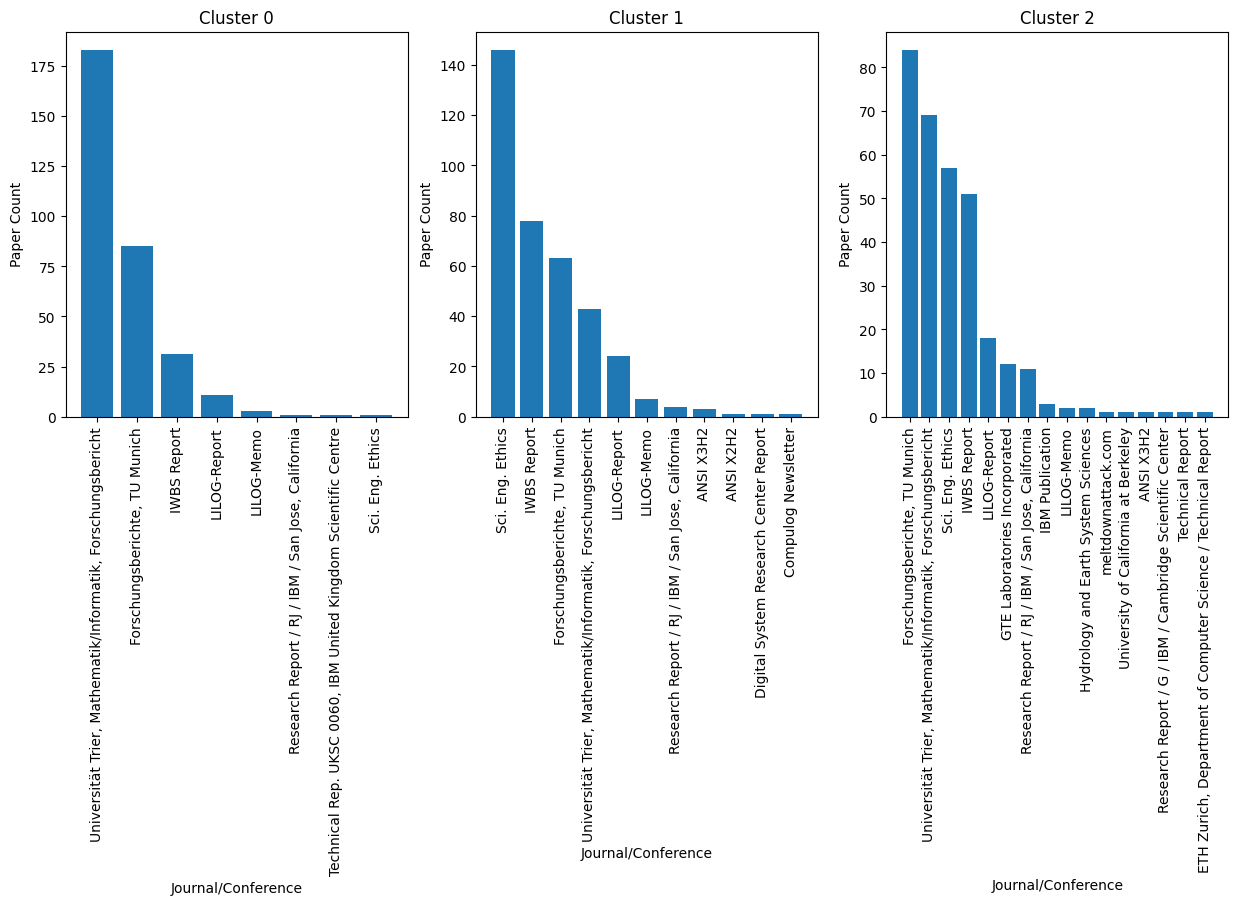

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, cluster in enumerate(journal_conference['cluster'].unique()):
    subset = journal_conference[journal_conference['cluster'] == cluster]
    ax = axes[i]
    ax.bar(subset['Jorunal_Conference'], subset['paperCount'])
    ax.set_title(f'Cluster {cluster}')
    ax.set_ylabel('Paper Count')
    ax.set_xlabel('Journal/Conference')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Authors

In [146]:
def extract_features_from_neo4j_authors():
    with driver.session() as session:
        result = session.run(
        """MATCH (a:Author)-[:writes]->(p:Papers)
WITH p.cluster AS cluster, a.name AS authorName, COUNT(p) AS numPapersWritten
ORDER BY numPapersWritten DESC
RETURN cluster, authorName, numPapersWritten
LIMIT 50;
        """)
        # Convert the result to a pandas DataFrame
        df = pd.DataFrame([r.values() for r in result], columns=result.keys())
    return df

In [147]:
authors=extract_features_from_neo4j_authors()
authors

,cluster,authorName,numPapersWritten
0,0,Christoph Meinel,32
1,1,Christoph Meinel,19
2,0,Christoph Beierle,15
3,0,Udo Pletat,13
4,1,John Shawe-Taylor,13
5,1,Zoubin Ghahramani,12
6,0,Lothar Breuer,12
7,0,Dieter Baum,11
8,0,Anna Slobodová,10
9,0,Klaus Jansen,10


In [150]:
def extract_features_from_neo4j_authors_bottom():
    with driver.session() as session:
        result = session.run(
        """MATCH (a:Author)-[:writes]->(p:Papers)
WITH p.cluster AS cluster, a.name AS authorName, COUNT(p) AS numPapersWritten
ORDER BY numPapersWritten ASC
RETURN cluster, authorName, numPapersWritten
LIMIT 30;
        """)
        # Convert the result to a pandas DataFrame
        df = pd.DataFrame([r.values() for r in result], columns=result.keys())
    return df

In [151]:
authorsB=extract_features_from_neo4j_authors_bottom()
authorsB

,cluster,authorName,numPapersWritten
0,0,Ido Dagan,1
1,1,Markus Höhfeld,1
2,2,Krishna G. Kulkarni,1
3,1,Rolf Sander,1
4,2,Daniel Genkin,1
5,1,Burkhard Kehrbusch,1
6,2,Werner Haas 0004,1
7,2,Stefan Mangard,1
8,2,Michael Schwarz 0001,1
9,2,Paul Kocher,1


# Profiling

Cluster 0 primarily comprises papers related to graph processing and mathematical methods. Notably, key conferences and journals within this cluster include "Universität Trier, Mathematik/Informatik" and "Forschungsberichte, TU Munich". Additionally, numerous authors have contributed extensively to this cluster, with a substantial number of published papers. Which made us think that the papers are reaserch university papers related to mathematics, informatics, and graph processing. This observation suggests that the papers are likely research-oriented, possibly originating from academic institutions with a strong emphasis on mathematics, informatics, and graph processing. Additionally, the high publication activity from authors affiliated with these institutions may indicate active research programs or collaborations within academia.

Cluster 1 predominantly focuses on AI, NLP and biology topics including ethical considerations in science and engineering.  Key conferences and journals within this cluster include "Sci. Eng. Ethics" and "IWBS Report." Similar to Cluster 0, numerous authors have contributed extensively to this cluster, as evidenced by their substantial publication records. This observation suggests that the papers within this cluster may primarily revolve around ethical aspects of scientific and engineering practices. Additionally, the high publication activity from authors affiliated with these institutions may indicate active research programs or collaborations within the field of ethics in science and engineering.

Cluster 2 